=== Handle imports and paths ===

In [1]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
%load_ext autoreload
%autoreload 2

=== Load the trained model ===

In [2]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

<All keys matched successfully>

=== Validate the model on the Female and Male testing sets ===

Males


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 7.811 across 558 observations
Variance and MAE Loss: 112.451 across 558 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_raw_age_gaps.png
Figure stats: mean = -2.2634504618740885 ; median = -1.8592351192546772 ; std = 6.2801871090963015 ; var = 39.440750125259356
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_corrected_age_gaps.png
Figure stats: mean = 0.3323489944864229 ; median = 0.023703268747802042 ; std = 3.046462832864293 ; var = 9.280935792023532

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg     adj_pval
       G_temporal_inf   rh -6.38 (-8.98)    70.12  0.04       -4.84 7.467002e-4

<Figure size 640x480 with 0 Axes>

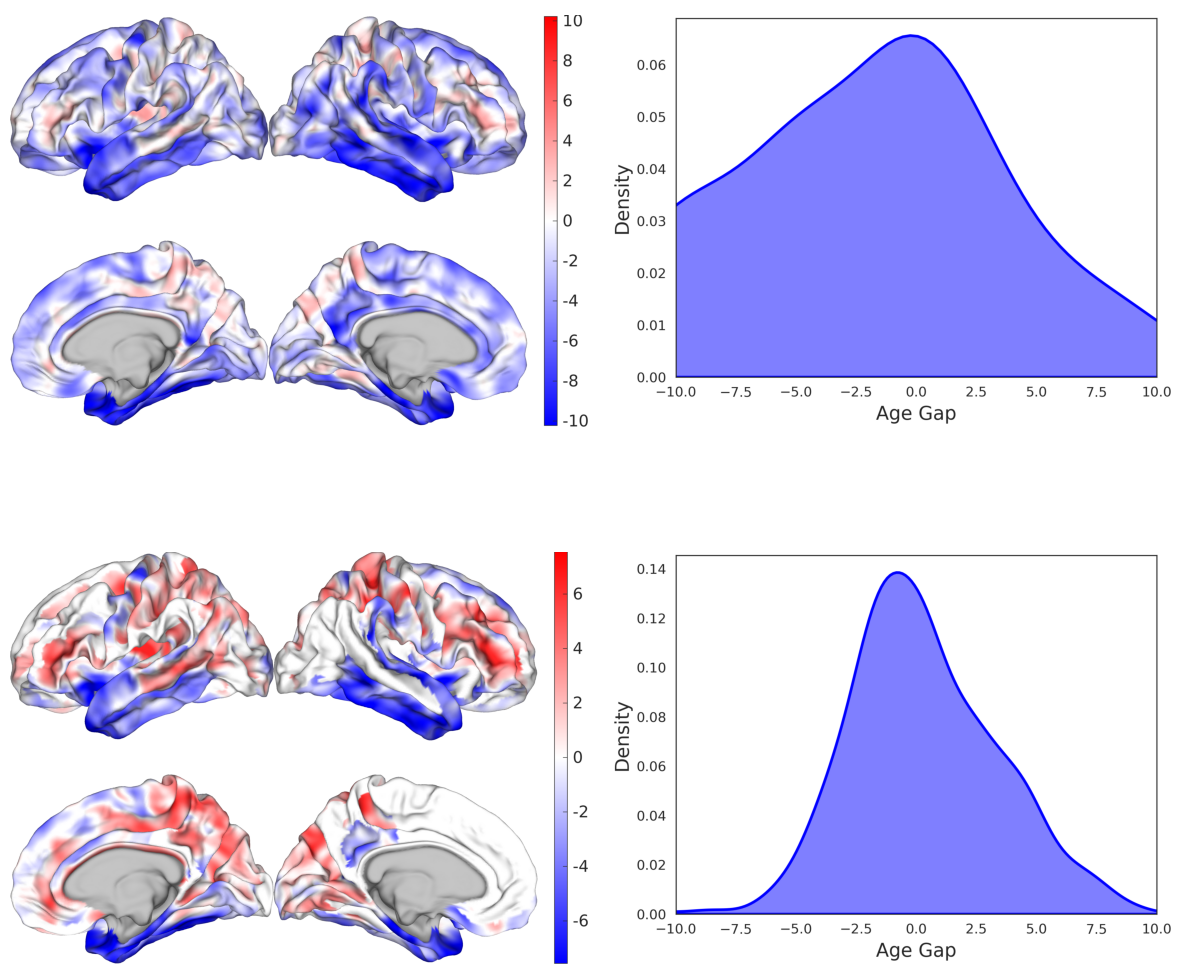

In [3]:
suffix='test_m'
test_model(X_test_CN_male, y_test_CN_male, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'), global_limits=10)

Females


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 7.556 across 570 observations
Variance and MAE Loss: 104.852 across 570 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_raw_age_gaps.png
Figure stats: mean = -1.1932747045560184 ; median = -1.2354406908366755 ; std = 6.078689884601369 ; var = 36.950470713155
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_corrected_age_gaps.png
Figure stats: mean = -0.3252738040197826 ; median = -0.6546871120508087 ; std = 2.878395647908045 ; var = 8.285161505895973

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg     adj_pval
       G_temporal_inf   rh -6.77 (-7.64)    86.79  0.09       -5.06 1.678566e-40
  

<Figure size 640x480 with 0 Axes>

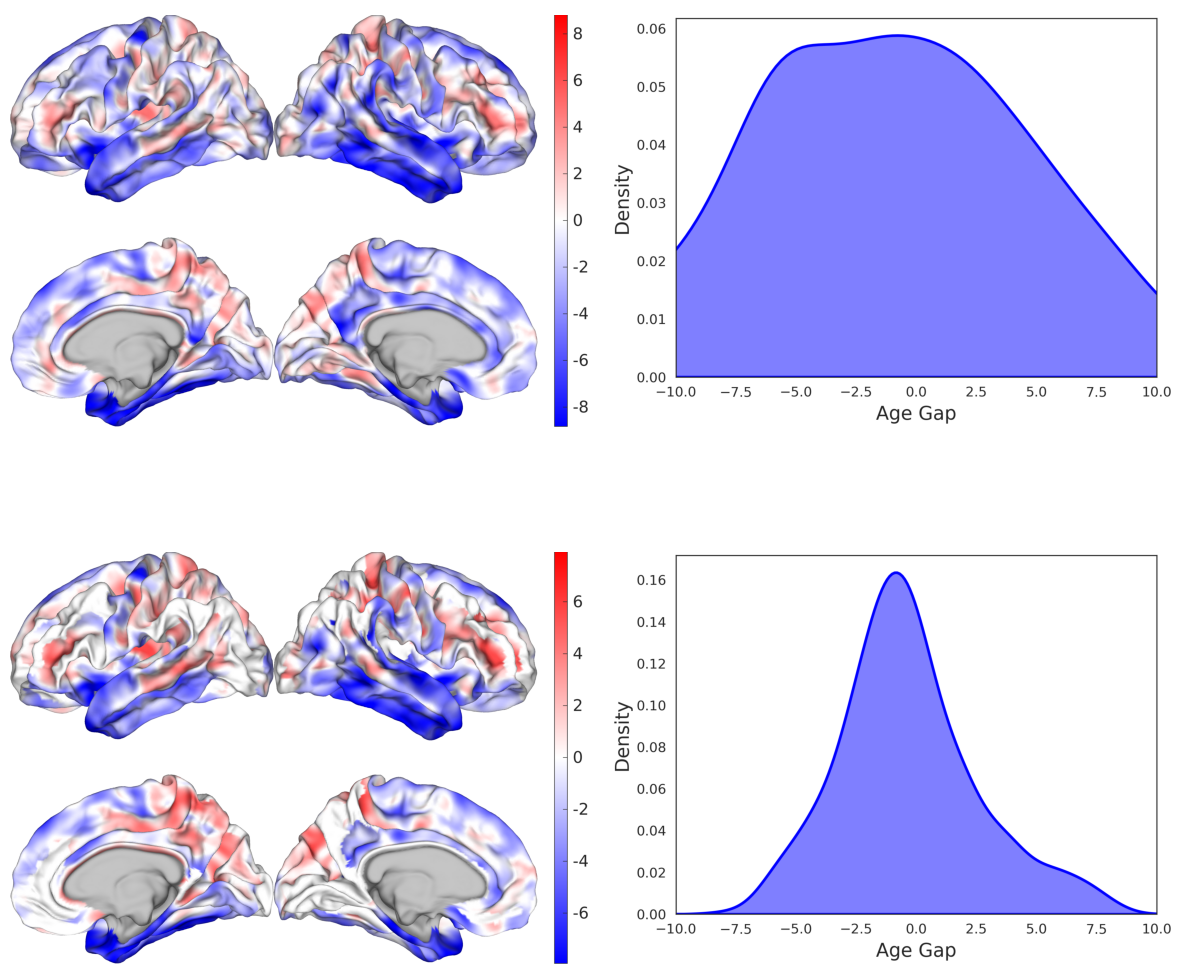

In [4]:
suffix='test_f'
test_model(X_test_CN_female, y_test_CN_female, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'), global_limits=10)

View differences in predictions and error across females and males


Top 10 significant age gaps:

                region hemi   age_gap     t_stat     raw_pval  region_avg     adj_pval  significant
 S_temporal_transverse   rh -1.435183  -4.582526 8.404925e-06   -1.157729 1.556468e-05            1
G_and_S_cingul-Mid-Ant   lh -1.256148 -14.288942 2.897160e-42   -1.158166 1.086435e-40            1
           G_front_sup   rh -1.087678 -21.455573 1.149501e-96   -1.065903 1.724251e-94            1
 S_precentral-sup-part   lh -1.082325  -7.885269 8.958877e-15   -1.037667 4.479438e-14            1
          G_precentral   rh -1.065534 -14.000778 2.055796e-42   -0.965394 1.027898e-40            1
G_and_S_cingul-Mid-Ant   rh -1.060183  -8.653804 1.765714e-17   -1.158166 1.103571e-16            1
           G_front_sup   lh -1.044129 -16.890362 6.734762e-62   -1.065903 5.051072e-60            1
  S_interm_prim-Jensen   lh -1.036794  -6.272478 1.474714e-09   -0.855818 3.880825e-09            1
     S_orbital_lateral   lh -1.011084  -5.243609 5.120426e-07   -0.98

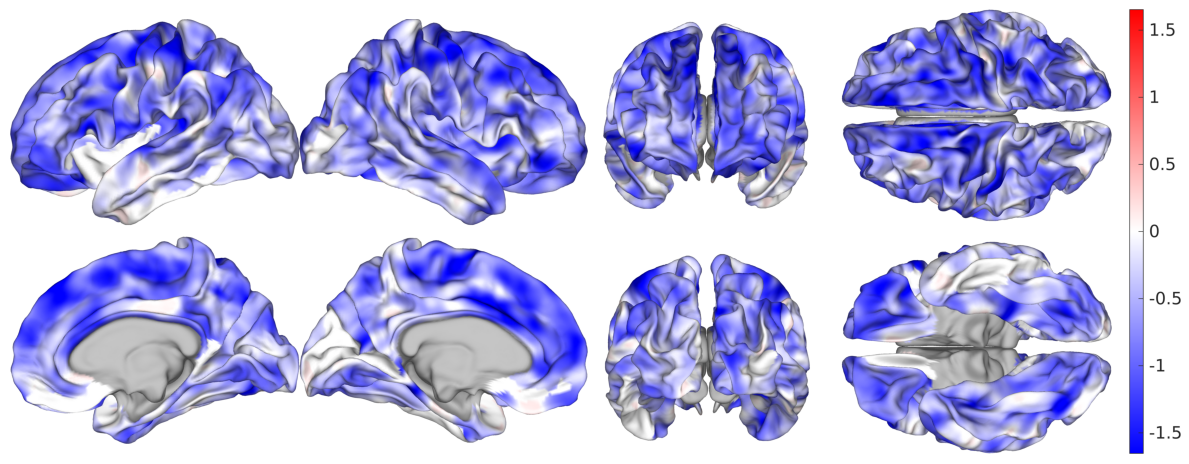

In [5]:
compare_cohorts(suffix='f-m', cohort_pred='test_f', cohort_ref='test_m') # pred - ref

Get the region stats, including average age gap, for CNs, ADs, and AD-CNs

In [6]:
print('\n\nFemales\n')
show_ranked_differences(suffix='test_f', output_dir=output_dir)
print('\n\nMales\n')
show_ranked_differences(suffix='test_m', output_dir=output_dir)
print('\n\nFemales-Males\n')
show_ranked_differences(suffix='f-m', output_dir=output_dir)



Females


All regions ranked by average age gap:
Region                               Avg Gap   LH Gap   RH Gap
-------------------------------------------------------------------------------------
S_postcentral                           2.75     2.44     3.06 
S_intrapariet_and_P_trans               2.68     2.97     2.39 
S_circular_insula_sup                   2.38     3.00     1.77 
S_front_inf                             2.37     1.71     3.03 
S_orbital_lateral                       2.23     2.38     2.08 
S_cingul-Marginalis                     2.13     1.64     2.62 
S_central                               2.12     2.57     1.68 
S_front_middle                          2.04     1.03     3.06 
Lat_Fis-ant-Horizont                    2.01     2.21     1.81 
S_parieto_occipital                     1.55     1.02     2.08 
Lat_Fis-ant-Vertical                    1.55     2.11     0.99 
S_oc_sup_and_transversal                1.48     1.41     1.56 
G_cuneus                        